１００kmあたりのガソリン消費量(consume)を予測

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D

例）モデル：線形回帰モデル→評価基準：二乗誤差→最適化：最小法二乗法

In [2]:
df_car=pd.read_csv("measurements.csv",decimal=",")#","を"."に直す。#decimal→区切りをカンマでなくて、"."にするということ。

display(df_car.head(10))

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
5,8.3,6.4,50,21.5,10,NaN,E10,0,0,0,NaN,NaN
6,7.8,4.4,43,21.5,11,NaN,E10,0,0,0,NaN,NaN
7,12.3,5.0,40,21.5,6,NaN,E10,0,0,0,NaN,NaN
8,4.9,6.4,26,21.5,4,NaN,E10,0,0,0,NaN,NaN
9,11.9,5.3,30,21.5,9,NaN,E10,0,0,0,NaN,NaN


distance：距離  　　
consume：100kmあたりの消費量(L)　 
speed:平均時速  
temp_inside：エアコンの設定　※欠損値(「NaN」)は中央値を入れることにする。  
temp_outside：外気温  
specials：雨、雪など気候変動がある場合は「AC」※とりあえず放置。  
gas_type：ガソリンの種類 ※ダミー変数へ変換。(E10：0 , SP98:1)   

In [3]:
df_car.count()

distance         388
consume          388
speed            388
temp_inside      376
temp_outside     388
specials          93
gas_type         388
AC               388
rain             388
sun              388
refill liters     13
refill gas        13
dtype: int64

In [4]:
df_car["temp_inside"].fillna(df_car.temp_inside.median(),inplace=True)
#"temp_inside"の欠損値を中央値に置き換える

In [5]:
df_car.isnull().any(axis=0)
#"temp_inside"の欠損値がなくなったのを確認

distance         False
consume          False
speed            False
temp_inside      False
temp_outside     False
specials          True
gas_type         False
AC               False
rain             False
sun              False
refill liters     True
refill gas        True
dtype: bool

In [6]:
df_car["gas_type"]=df_car["gas_type"].replace({"E10":0,"SP98":1})
#"gas_type"をダミー変数に変える(E10：0 , SP98:1)

df_car.head(10)

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,0,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,0,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,0,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,0,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,0,0,0,0,NaN,NaN
5,8.3,6.4,50,21.5,10,NaN,0,0,0,0,NaN,NaN
6,7.8,4.4,43,21.5,11,NaN,0,0,0,0,NaN,NaN
7,12.3,5.0,40,21.5,6,NaN,0,0,0,0,NaN,NaN
8,4.9,6.4,26,21.5,4,NaN,0,0,0,0,NaN,NaN
9,11.9,5.3,30,21.5,9,NaN,0,0,0,0,NaN,NaN


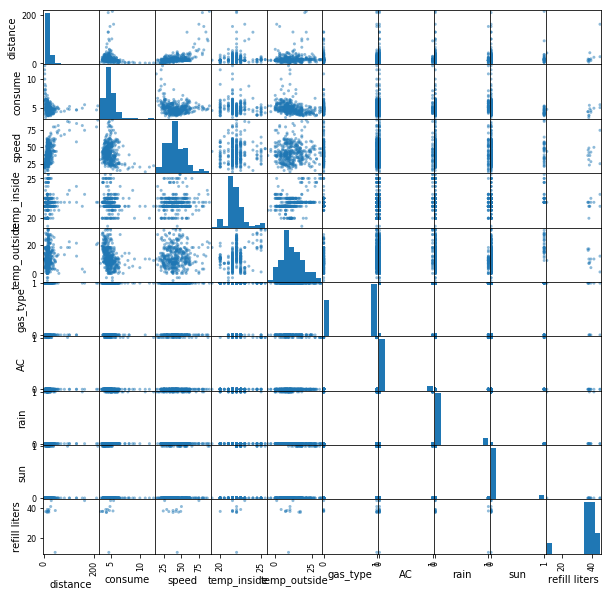

In [7]:
pd.plotting.scatter_matrix(df_car, figsize=(10,10))
plt.show()

In [8]:
df_car.describe()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,refill liters
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,13.000000
mean,19.652835,4.912371,41.927835,21.931701,11.358247,0.587629,0.077320,0.123711,0.082474,37.115385
std,22.667837,1.033172,13.598524,0.994741,6.991542,0.492897,0.267443,0.329677,0.275441,8.587282
min,1.300000,3.300000,14.000000,19.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,10.000000
25%,11.800000,4.300000,32.750000,21.500000,7.000000,0.000000,0.000000,0.000000,0.000000,37.600000
50%,14.600000,4.700000,40.500000,22.000000,10.000000,1.000000,0.000000,0.000000,0.000000,38.000000
75%,19.000000,5.300000,50.000000,22.500000,16.000000,1.000000,0.000000,0.000000,0.000000,39.000000
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000,1.000000,45.000000


In [9]:
df_car.corr()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,refill liters
distance,1.000000,-0.128967,0.562299,0.074734,0.088175,-0.053411,-0.025738,-0.019791,0.081120,0.132852
consume,-0.128967,1.000000,-0.227866,-0.161470,-0.320811,-0.015327,0.096591,0.248118,-0.170667,0.100868
speed,0.562299,-0.227866,1.000000,0.059139,0.015411,-0.097360,-0.035408,0.009489,0.081618,0.049673
temp_inside,0.074734,-0.161470,0.059139,1.000000,0.359649,0.010921,0.296719,-0.037204,0.242237,0.034128
temp_outside,0.088175,-0.320811,0.015411,0.359649,1.000000,0.148705,0.167562,-0.186315,0.346903,-0.084867
gas_type,-0.053411,-0.015327,-0.097360,0.010921,0.148705,1.000000,0.105285,0.060328,0.022761,-0.238081
AC,-0.025738,0.096591,-0.035408,0.296719,0.167562,0.105285,1.000000,0.242915,0.088598,NaN
rain,-0.019791,0.248118,0.009489,-0.037204,-0.186315,0.060328,0.242915,1.000000,-0.112650,-0.494501
sun,0.081120,-0.170667,0.081618,0.242237,0.346903,0.022761,0.088598,-0.112650,1.000000,NaN
refill liters,0.132852,0.100868,0.049673,0.034128,-0.084867,-0.238081,NaN,-0.494501,NaN,1.000000


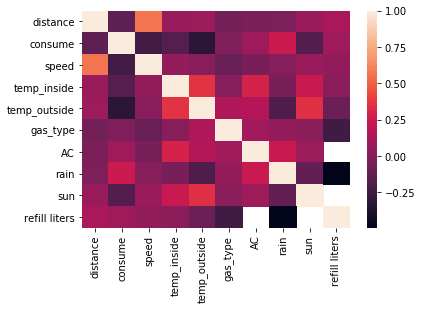

In [10]:
sns.heatmap(df_car.corr())
plt.show()

In [11]:
#相関関係が大きそうなのは、“speed”,“temp_outside”,"rain"の三つ。

In [12]:
#線形回帰モデルをつかう。
#係数を求める
y = df_car["consume"].values
X = df_car[["speed", "temp_outside","rain"]].values
regr = LinearRegression(fit_intercept=True)
regr.fit(X, y)

#重みを取り出す
w0 = regr.intercept_
w1 = regr.coef_[0]
w2 = regr.coef_[1]
w3 = regr.coef_[2]

In [13]:
#変数の設定
x1 = df_car["speed"]
x2 = df_car["temp_outside"]
x3 = df_car["rain"]
y = df_car["consume"]

#重みと二乗誤差の確認
y_est = w0 + w1 * x1 + w2 * x2 + w3 * x3
squared_error = 0.5 * np.sum((y - y_est) ** 2)
print('w0 = {:.3f}, w1 = {:.3f}, w2 = {:.3f}, w3 = {:.3f},'.format(w0, w1, w2, w3,))
print('二乗誤差 = {:.3f}'.format(squared_error))

w0 = 6.024, w1 = -0.017, w2 = -0.041, w3 = 0.621,
二乗誤差 = 167.210


In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from  sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix 

In [15]:
# 値を予測
y_pred = regr.predict(X)

# MSEを計算
mse = mean_squared_error(y, y_pred) 
print("MSE = %s"%round(mse,3) )  

# MAEを計算
mae = mean_absolute_error(y, y_pred) 
print("MAE = %s"%round(mae,3) )

# RMSEを計算
rmse = np.sqrt(mse)
print("RMSE = %s"%round(rmse, 3) )

MSE = 0.862
MAE = 0.619
RMSE = 0.928


In [16]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split # ホールドアウト法に関する関数
from sklearn.model_selection import KFold # 交差検証法に関する関数
from sklearn.metrics import mean_absolute_error # 回帰問題における性能評価に関する関数
from sklearn.linear_model import Ridge,Lasso,ElasticNet #正則化項付き最小二乗法を行うためのライブラリ
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

データ数が少ないので、交差検証（クロスバリデーション）法を使う

In [28]:
x= df_car[["speed", "temp_outside","rain"]].values
y=df_car["consume"].values

In [29]:
X=x.reshape(-1,3)
n_split = 5 # グループ数を設定（今回は5分割）

cross_valid_mse = 0
cross_valid_mae = 0
cross_valid_rmse=0
split_num = 1

# テスト役を交代させながら学習と評価を繰り返す
for train_idx, test_idx in KFold(n_splits=n_split, shuffle=True, random_state=1234).split(X, y):
    X_train, y_train = X[train_idx], y[train_idx] #学習用データ
    X_test, y_test = X[test_idx], y[test_idx]     #テスト用データ
    
    # 学習用データを使って線形回帰モデルを学習
    regr = LinearRegression(fit_intercept=True)
    regr.fit(X_train, y_train)
    # テストデータに対する予測を実行
    y_pred_test = regr.predict(X_test)
    
    squared_error = 0.5 * np.sum((y_test-y_pred_test) ** 2)#二乗誤差
      
    
    # テストデータに対する二乗誤差,MSE,MAE,RMSE,を計算
    mse=mean_squared_error(y_test, y_pred_test)
    mae=mean_absolute_error(y_test, y_pred_test)
    rmse=np.sqrt(mse)
    print("Fold %s"%split_num)
    print('二乗誤差 = {:.3f}'.format(squared_error))
    print("MSE = %s"%round(mse,3) ) 
    print("MAE = %s"%round(mae, 3))
    print("RMSE=%s"%round(rmse,3)) 
    print()
    
    #後で平均を取るために加算
    cross_valid_mse+=mse
    cross_valid_mae+=mae 
    cross_valid_rmse+=rmse
    split_num += 1
    
    

# 平均値を最終的な汎化誤差値とする
final_mse=cross_valid_mse/n_split
final_mae = cross_valid_mae / n_split
final_rmse=cross_valid_rmse/n_split

print("平均　二乗誤差={:.3f}".format(squared_error))
print("Cross Validation MSE=%s"%round(final_mse, 3))
print("Cross Validation MAE=%s"%round(final_mae, 3))
print("Cross Validation RMSE=%s"%round(final_rmse,3))

Fold 1
二乗誤差 = 26.132
MSE = 0.67
MAE = 0.661
RMSE=0.819

Fold 2
二乗誤差 = 28.651
MSE = 0.735
MAE = 0.619
RMSE=0.857

Fold 3
二乗誤差 = 60.330
MSE = 1.547
MAE = 0.727
RMSE=1.244

Fold 4
二乗誤差 = 35.726
MSE = 0.928
MAE = 0.602
RMSE=0.963

Fold 5
二乗誤差 = 21.150
MSE = 0.549
MAE = 0.512
RMSE=0.741

平均　二乗誤差=21.150
Cross Validation MSE=0.886
Cross Validation MAE=0.624
Cross Validation RMSE=0.925


Day1の時の評価指標　　
MSE = 0.862　　
MAE = 0.619　　
RMSE = 0.928　　

二乗誤差= 167.210

評価指数の精度が下がっている・・・。


正則化,異常値検索,標準化は時間が無くてできず。